# eFLINT exploration notebook

eFLINT can be communicated with through commandlines, for example this is a command to getting the server status.

In [1]:
from networkx.algorithms.bipartite.cluster import modes
!echo '{ "command": "status" }' | nc localhost 8080

{"all-disabled-transitions":[],"all-duties":[],"all-enabled-transitions":[],"created_facts":[],"errors":[],"inst-query-results":[],"new-disabled-transitions":[],"new-duties":[],"new-enabled-transitions":[],"new-state":335,"old-state":334,"output-events":[],"query-results":[],"response":"success","source_contents":[],"target_contents":[],"terminated-duties":[],"terminated_facts":[],"violations":[]}


First we have to set up python to be able to communicate with eFLINT server through command lines

In [2]:
import subprocess

cmd = '''echo '{ "command": "status" }' | nc localhost 8080'''
result = subprocess.check_output(cmd, shell=True, text=True)

print("eFLINT replied with:")
print(result)

eFLINT replied with:
{"all-disabled-transitions":[],"all-duties":[],"all-enabled-transitions":[],"created_facts":[],"errors":[],"inst-query-results":[],"new-disabled-transitions":[],"new-duties":[],"new-enabled-transitions":[],"new-state":335,"old-state":334,"output-events":[],"query-results":[],"response":"success","source_contents":[],"target_contents":[],"terminated-duties":[],"terminated_facts":[],"violations":[]}



Now we want to parse these response into data structure or a class in python

This is a hard coded, we would prefer it to be a class. To make Jupyter notebook reload my EF class, we will use `importlib` package.


In [3]:

from eflint import eflint_lib, eflint_parser
import importlib

importlib.reload(eflint_lib)

from eflint.eflint_lib import EF

ef = EF()

Now verify it.

In [4]:
response = ef.send_eflint_command({"command": "status"})
print("eFLINT from function replied with: " + result)

eFLINT from function replied with: {"all-disabled-transitions":[],"all-duties":[],"all-enabled-transitions":[],"created_facts":[],"errors":[],"inst-query-results":[],"new-disabled-transitions":[],"new-duties":[],"new-enabled-transitions":[],"new-state":335,"old-state":334,"output-events":[],"query-results":[],"response":"success","source_contents":[],"target_contents":[],"terminated-duties":[],"terminated_facts":[],"violations":[]}



And we should also make this a function in EF class. Now these responses are a string which is hard to work with. We will parse them into dataclasses.

In [5]:
ef.status()

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 335,
 'old-state': 334,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

In [6]:
from dataclasses import dataclass
from typing import List


@dataclass
class ServerStatusResponse:
    all_disabled_transitions: List[str]
    all_duties: List[str]
    all_enabled_transitions: List[str]
    created_facts: List[str]
    errors: List[str]
    inst_query_results: List[str]
    new_disabled_transitions: List[str]
    new_duties: List[str]
    new_enabled_transitions: List[str]
    new_state: int
    old_state: int
    output_events: List[str]
    query_results: List[str]
    response: str
    source_contents: List[str]
    target_contents: List[str]
    terminated_duties: List[str]
    terminated_facts: List[str]
    violations: List[str]

Because response are using kebab case, but in Python snake case are preferred.

In [7]:
def kebab_to_snake(s):
    return s.replace('-', '_')


def convert_keys_kebab_to_snake(d):
    return {kebab_to_snake(k): v for k, v in d.items()}

In [8]:
parsed_snake = convert_keys_kebab_to_snake(EF().status())
response = ServerStatusResponse(**parsed_snake)

Now this is our response object.

In [9]:
response

ServerStatusResponse(all_disabled_transitions=[], all_duties=[], all_enabled_transitions=[], created_facts=[], errors=[], inst_query_results=[], new_disabled_transitions=[], new_duties=[], new_enabled_transitions=[], new_state=335, old_state=334, output_events=[], query_results=[], response='success', source_contents=[], target_contents=[], terminated_duties=[], terminated_facts=[], violations=[])

In [10]:
response.response

'success'

---

# eFLINTAnswer

Now, our project is objective is to introduce support for human in the loop for distributed policy systems. For example, to build and own a house in Amsterdam there are many legal entity to produce policy that homeowner must comply to. Such as Heritage Regulations and Water Management Regulations, reality is so much more complicated but this is a good scenarios that will highlight our contribution. Which will be a questionnaires to help potential homeowner navigates this complex legal structure through eFLINT.

But to do that, first we have to put some policy into our eFLINT server. Which is done by using "phrase" command. And for that we'll go with even simpler example.

In [11]:
ef.phrase("Fact entity Identified by String")
ef.phrase("Fact featherless Identified by entity")
ef.phrase("Fact biped Identified by entity")
ef.phrase("Fact human Identified by entity Holds when featherless(entity) && biped(entity)")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 339,
 'old-state': 338,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

Now we want to check if there is a new fact, actually it's a type in eFLINT, created in the eFLINT server.

In [12]:
!echo '{"command": "types"}' | nc localhost 8080

{"types":{"actor":{"closed":true,"conditions":[],"derivation":[],"domain":{"domain-type":"AnyString"},"domain_constraint":{"b":true,"term-type":"BoolLit"},"kind":{"fact":{"actor":true,"invariant":false},"kind-type":"Fact"}},"biped":{"closed":true,"conditions":[],"derivation":[],"domain":{"domain-type":"Products","vars":[{"domID":"entity","string":""}]},"domain_constraint":{"b":true,"term-type":"BoolLit"},"kind":{"fact":{"actor":false,"invariant":false},"kind-type":"Fact"}},"entity":{"closed":true,"conditions":[],"derivation":[],"domain":{"domain-type":"AnyString"},"domain_constraint":{"b":true,"term-type":"BoolLit"},"kind":{"fact":{"actor":false,"invariant":false},"kind-type":"Fact"}},"featherless":{"closed":true,"conditions":[],"derivation":[],"domain":{"domain-type":"Products","vars":[{"domID":"entity","string":""}]},"domain_constraint":{"b":true,"term-type":"BoolLit"},"kind":{"fact":{"actor":false,"invariant":false},"kind-type":"Fact"}},"human":{"closed":true,"conditions":[],"deriva

After confirming that the commands work, We want to parse it to a function.

In [13]:
types_response = ef.types()
types_response

{'types': {'actor': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyString'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': True, 'invariant': False}, 'kind-type': 'Fact'}},
  'biped': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'Products',
    'vars': [{'domID': 'entity', 'string': ''}]},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  'entity': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyString'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  'featherless': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'Products',
    'vars': [{'domID': 'entity', 'string': ''}]},
   

In [14]:
types_response["types"]["human"]

{'closed': True,
 'conditions': [],
 'derivation': [{'derivation-type': 'HoldsWhen',
   'term': {'t1': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
          'var': {'domID': 'entity', 'string': ''}},
         'var': {'domID': 'entity', 'string': ''}}]},
      'domID': 'featherless',
      'term-type': 'App'},
     'term-type': 'Present'},
    't2': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
          'var': {'domID': 'entity', 'string': ''}},
         'var': {'domID': 'entity', 'string': ''}}]},
      'domID': 'biped',
      'term-type': 'App'},
     'term-type': 'Present'},
    'term-type': 'And'}}],
 'domain': {'domain-type': 'Products',
  'vars': [{'domID': 'entity', 'string': ''}]},
 'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
 'kind': {'fact': {'actor': False, 'invariant': False}, 'kind-type': 'Fact'}}

We want to extract dependency of type "human" and we should be able to see that to be human it holds when it is featherless and biped. We want to display this in a graph form

In [15]:
@dataclass
class Node:
    name: str
    dependencies: List["Node"]

    def __repr__(self):
        """Custom representation to avoid recursion depth issues when printing"""
        dep_names = [dep.name for dep in self.dependencies]
        return f"Node(name='{self.name}', dependencies={dep_names})"

In [16]:
def typeinfo_to_node(type_info: dict, type_name: str = "human") -> Node:
    """
    Convert a response types dict to a Node object with dependencies.
    """
    dependencies = []
    for derivation in type_info["derivation"]:
        if derivation["derivation-type"] == 'HoldsWhen':
            if derivation["term"]["term-type"] == 'And':
                dep_1 = derivation["term"]["t1"]["t"]["domID"]
                dependencies.append(Node(name=dep_1, dependencies=[]))
                dep_2 = derivation["term"]["t2"]["t"]["domID"]
                dependencies.append(Node(name=dep_2, dependencies=[]))

    return Node(name=type_name, dependencies=dependencies)

In [17]:
human_node = typeinfo_to_node(types_response["types"]["human"], "human")
human_node

Node(name='human', dependencies=['featherless', 'biped'])

In [18]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_node(node):
    """Visualize a Node and its dependencies as a graph."""
    # Create directed graph
    graph = nx.DiGraph()

    # Add the main node
    graph.add_node(node.name)

    # Add dependency nodes and edges
    for dep in node.dependencies:
        graph.add_node(dep.name)
        graph.add_edge(node.name, dep.name)

    # Create figure
    plt.figure(figsize=(8, 6))

    # Set node positions
    pos = nx.spring_layout(graph)

    # Draw nodes with labels
    nx.draw(graph, pos, with_labels=True,
            node_color='white',
            edgecolors='black',
            node_size=1500,
            font_size=10,
            font_weight='normal',
            width=1,
            arrows=True,
            arrowsize=15)

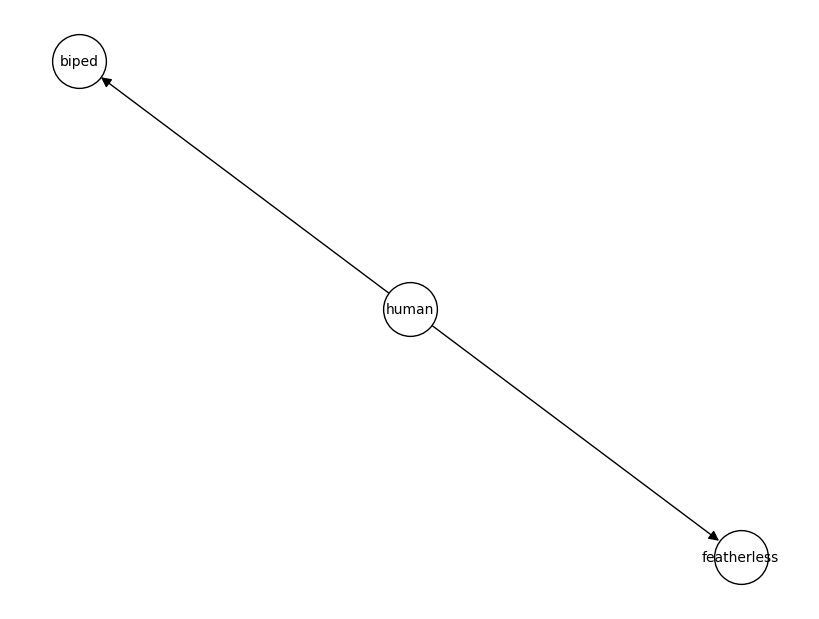

In [19]:
visualize_node(human_node)

Now we need `create` function to create an instance in eFLINT server to set actual rules.

Now we want to ask some question, like asking plato if something is human. But first we need to create an instance of a type in eFLINT server. To do that we need `create

In [20]:
ef.create("entity", "chicken")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [{'fact-type': 'entity',
   'tagged-type': 'string',
   'textual': 'entity("chicken")',
   'value': 'chicken'}],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 340,
 'old-state': 339,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [{'fact-type': 'entity',
   'tagged-type': 'string',
   'textual': 'entity("chicken")',
   'value': 'chicken'}],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

Now to ask eFLINT server if chicken is human, we need to use `query` command.

In [21]:
q_res = ef.query("human", "chicken")
q_res["query-results"]

['failure']

Query result is `'failure'` which means chicken is not human. Now let's add that the chicken is featherless and biped.

In [22]:
_ = ef.create("featherless", "chicken")
_ = ef.create("biped", "chicken")

In [23]:
q_res = ef.query("human", "chicken")
q_res["query-results"]

['success']

But eFLINT also support `Act` command, which is like another type but can create, modify and delete instance of Fact. And it also has actor and recipient. And Plato will also be use in this example. First we need to create entity called Plato then create an Act.

In [24]:
ef.create("entity", "Plato")
ef.create("entity", "cow")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [{'fact-type': 'entity',
   'tagged-type': 'string',
   'textual': 'entity("cow")',
   'value': 'cow'}],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 346,
 'old-state': 345,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [{'fact-type': 'entity',
   'tagged-type': 'string',
   'textual': 'entity("Plato")',
   'value': 'Plato'},
  {'fact-type': 'entity',
   'tagged-type': 'string',
   'textual': 'entity("chicken")',
   'value': 'chicken'},
  {'arguments': [{'fact-type': 'entity',
     'tagged-type': 'string',
     'textual': 'entity("chicken")',
     'value': 'chicken'}],
   'fact-type': 'biped',
   'tagged-type': 'product',
   'textual': 'biped(entity("chicken"))'},
  {'arguments': [{'fact-type': 'entity',
     'tagged-type': 'string',
     'textual': '

In [25]:
_ = ef.phrase('Act ask-if-human Actor entity1 Recipient entity2 Holds when featherless(entity1) && biped(entity1)')

In [26]:
_ = ef.action("ask-if-human", "Plato", "Cow")

From that, We found that doing action is practically useless, because what I care is what would enable (make something true) which could be just a query. So We will just use query instead of action.

Let's add some more complexity. we will not manually add if something is biped anymore, but we will ask 'how many legs does it have' instead and then infer it from there. To do this, we will use `revert` to go back to state before anything is defined.

In [27]:
history_response = ef.history()
list(filter(lambda edge: edge["source_id"] == 1, history_response["edges"]))

[{'all-disabled-transitions': [],
  'all-duties': [],
  'all-enabled-transitions': [],
  'created_facts': [],
  'errors': [],
  'new-disabled-transitions': [],
  'new-duties': [],
  'new-enabled-transitions': [],
  'output-events': [],
  'phrase': 'Fact entity Identified by String\nType extension of entity\n',
  'query-results': [],
  'source_contents': [],
  'source_id': 1,
  'target_contents': [],
  'target_id': 294,
  'terminated-duties': [],
  'terminated_facts': [],
  'violations': []}]

In [28]:
ef.revert(1)
ef.status()

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 1,
 'old-state': 1,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

In [29]:
ef.phrase("Fact entity Identified by String")
ef.phrase("Fact number_of_legs Identified by entity * int")
ef.phrase("Fact featherless Identified by entity")
ef.phrase("Fact biped Identified by entity Holds when (Exists number_of_legs : number_of_legs(entity, 2))")
ef.phrase("Fact human Identified by entity Holds when featherless(entity) && biped(entity)")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 352,
 'old-state': 351,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

In [30]:
ef.create("entity", "chicken")
ef.query("human", "chicken")["query-results"]

['failure']

In [31]:
ef.create("featherless", "chicken")
ef.create("number_of_legs", ["chicken", 2])
ef.query("human", "chicken")["query-results"]

['success']

Why `ef.phrase("Fact biped Identified by entity Holds when (Exists n : number_of_legs(entity, 2))")` is not working?

In [32]:
types_response = ef.types()
types_response["types"]["biped"]

{'closed': True,
 'conditions': [],
 'derivation': [{'derivation-type': 'HoldsWhen',
   'term': {'t': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
          'var': {'domID': 'entity', 'string': ''}},
         'var': {'domID': 'entity', 'string': ''}},
        {'term': {'domID': 'int',
          't': {'int': 2, 'term-type': 'IntLit'},
          'term-type': 'Tag'},
         'var': {'domID': 'int', 'string': ''}}]},
      'domID': 'number_of_legs',
      'term-type': 'App'},
     'term-type': 'Present'},
    'term-type': 'Exists',
    'vars': [{'domID': 'number_of_legs', 'string': ''}]}}],
 'domain': {'domain-type': 'Products',
  'vars': [{'domID': 'entity', 'string': ''}]},
 'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
 'kind': {'fact': {'actor': False, 'invariant': False}, 'kind-type': 'Fact'}}

In [33]:
human_node = typeinfo_to_node(types_response["types"]["human"], "human")
human_node

Node(name='human', dependencies=['featherless', 'biped'])

We can see that the graph is not complete, because we don't have `number_of_legs` in the graph. So we need to add that to the graph.

In [34]:
types_response["types"]["biped"]

{'closed': True,
 'conditions': [],
 'derivation': [{'derivation-type': 'HoldsWhen',
   'term': {'t': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
          'var': {'domID': 'entity', 'string': ''}},
         'var': {'domID': 'entity', 'string': ''}},
        {'term': {'domID': 'int',
          't': {'int': 2, 'term-type': 'IntLit'},
          'term-type': 'Tag'},
         'var': {'domID': 'int', 'string': ''}}]},
      'domID': 'number_of_legs',
      'term-type': 'App'},
     'term-type': 'Present'},
    'term-type': 'Exists',
    'vars': [{'domID': 'number_of_legs', 'string': ''}]}}],
 'domain': {'domain-type': 'Products',
  'vars': [{'domID': 'entity', 'string': ''}]},
 'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
 'kind': {'fact': {'actor': False, 'invariant': False}, 'kind-type': 'Fact'}}

In [35]:
for key, value in types_response["types"].items():
    if key not in {"actor", "int", "string"}:
        print(key, typeinfo_to_node(value, key))

biped Node(name='biped', dependencies=[])
entity Node(name='entity', dependencies=[])
featherless Node(name='featherless', dependencies=[])
human Node(name='human', dependencies=['featherless', 'biped'])
number_of_legs Node(name='number_of_legs', dependencies=[])


In [36]:
def create_graph(types_res: dict, type_name: str) -> Node:
    """
    Convert a response types dict to a Node object with dependencies. !!! Now Recursively !!!
    """
    dependencies = []
    type_info = types_res[type_name]
    for derivation in type_info["derivation"]:
        if derivation["derivation-type"] == 'HoldsWhen':
            if derivation["term"]["term-type"] == 'Exists':
                dep = derivation["term"]["t"]["t"]["domID"]
                dep_node = create_graph(types_res, dep)
                dependencies.append(dep_node)
            if derivation["term"]["term-type"] == 'And':
                dep_1 = derivation["term"]["t1"]["t"]["domID"]
                dep_1_node = create_graph(types_res, dep_1)
                dependencies.append(dep_1_node)
                dep_2 = derivation["term"]["t2"]["t"]["domID"]
                dep_2_node = create_graph(types_res, dep_2)
                dependencies.append(dep_2_node)

    return Node(name=type_name, dependencies=dependencies)

In [37]:
create_graph(types_response["types"], "human")

Node(name='human', dependencies=['featherless', 'biped'])

In [38]:
def visualize_graph(node):
    """Visualize a Node and its dependencies as a graph."""
    # Create directed graph
    graph = nx.DiGraph()

    # Add the main node
    graph.add_node(node.name)

    # Add dependency nodes and edges recursively
    def add_edges(n):
        for dep in n.dependencies:
            graph.add_node(dep.name)
            graph.add_edge(n.name, dep.name)
            add_edges(dep)

    add_edges(node)

    # Create figure
    plt.figure(figsize=(8, 6))

    # Set node positions
    pos = nx.spring_layout(graph)

    # Draw nodes with labels
    nx.draw(graph, pos, with_labels=True,
            node_color='white',
            edgecolors='black',
            node_size=1500,
            font_size=10,
            font_weight='normal',
            width=1,
            arrows=True,
            arrowsize=15)

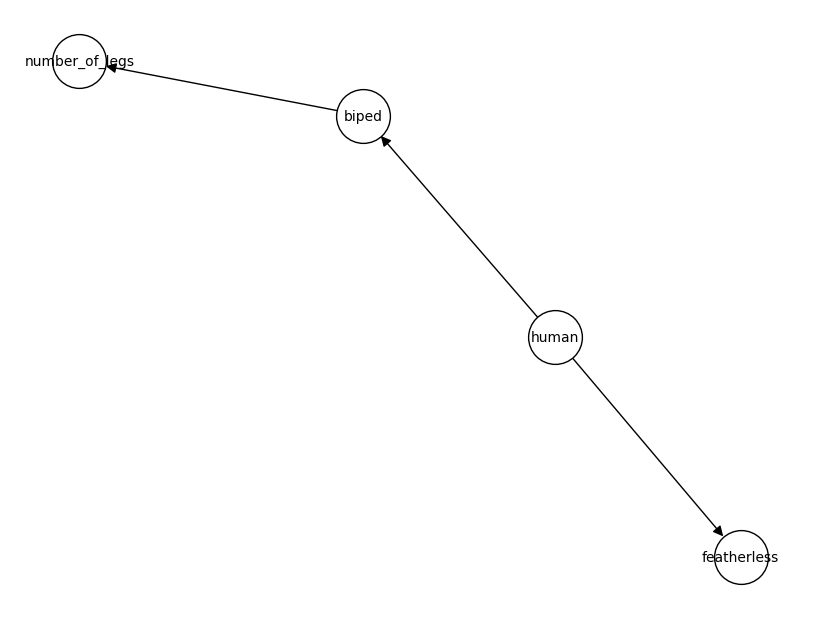

In [39]:
visualize_graph(create_graph(types_response["types"], "human"))

Right now every relation is a conjunction, but we should to be able to use `or` as well. So we need to add that to the graph. So we need to make sure our graph understand that.
So let's add another fact that could bypass `biped` and `featherless` and make it human, which is `intelligent`. This would mean our current graph is not sufficient to represent this conjunction and disjunction.

In [40]:
ef.revert(1)
ef.phrase("Fact entity Identified by String")
ef.phrase("Fact number_of_legs Identified by entity * int")
ef.phrase("Fact featherless Identified by entity")
ef.phrase("Fact biped Identified by entity Holds when (Exists number_of_legs : number_of_legs(entity, 2))")
ef.phrase("Fact intelligent Identified by entity")  # this is the new one
ef.phrase("Fact human Identified by entity Holds when (biped(entity) && featherless(entity)) || intelligent(entity)")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 363,
 'old-state': 362,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

In [41]:
ef.create("entity", "dolphin")
q_res = ef.query("human", "dolphin")
q_res["query-results"]

['failure']

In [42]:
ef.types()

{'types': {'actor': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyString'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': True, 'invariant': False}, 'kind-type': 'Fact'}},
  'biped': {'closed': True,
   'conditions': [],
   'derivation': [{'derivation-type': 'HoldsWhen',
     'term': {'t': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
            'var': {'domID': 'entity', 'string': ''}},
           'var': {'domID': 'entity', 'string': ''}},
          {'term': {'domID': 'int',
            't': {'int': 2, 'term-type': 'IntLit'},
            'term-type': 'Tag'},
           'var': {'domID': 'int', 'string': ''}}]},
        'domID': 'number_of_legs',
        'term-type': 'App'},
       'term-type': 'Present'},
      'term-type': 'Exists',
      'vars': [{'domID': 'number_of_legs', 'string': ''}]}}],
   'domain': {'domain-type': 'Products',
    'vars': [{'domID': 'entity', 'string': ''}]},
 

In [43]:
ef.create("intelligent", "dolphin")
ef.create("number_of_legs", ["dolphin", 0])
ef.create("featherless", "dolphin")
q_res = ef.query("human", "dolphin")
q_res["query-results"]

['success']

The query works, but the graph is broken. We have to fix this

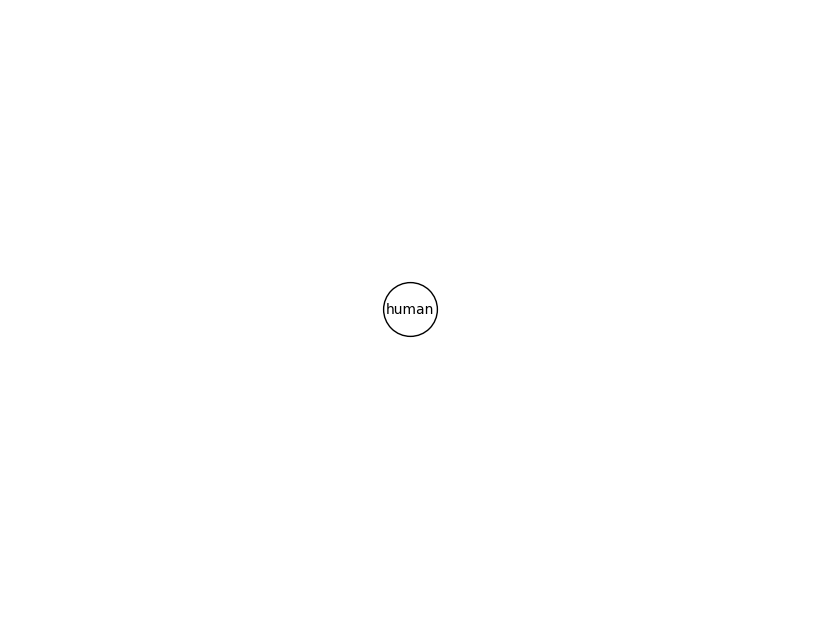

In [44]:
visualize_graph(create_graph(ef.types()["types"], "human"))

In [45]:
def extract_dom_ids(term: dict) -> list:
    """
    Recursively extract all domID values from 'App' terms within a term tree.
    """
    dom_ids = []
    term_type = term.get("term-type")

    if term_type == "App":
        dom_id = term.get("domID")
        if dom_id:
            dom_ids.append(dom_id)
        # Recurse into arguments
        args = term.get("args", {}).get("Right", [])
        for arg in args:
            inner_term = arg.get("term")
            if inner_term:
                dom_ids.extend(extract_dom_ids(inner_term))

    elif term_type in {"Present", "Not", "Exists"}:
        inner_term = term.get("t")
        if inner_term:
            dom_ids.extend(extract_dom_ids(inner_term.get("t", inner_term)))

    elif term_type in {"And", "Or"}:
        for sub_term_key in ["t1", "t2"]:
            if sub_term_key in term:
                dom_ids.extend(extract_dom_ids(term[sub_term_key]))

    elif term_type == "Ref":
        pass  # typically no domID to extract from Ref itself

    return dom_ids


def create_graph(types_res: dict, type_name: str) -> Node:
    """
    Convert a response types dict to a Node object with dependencies. Recursively extracts all domIDs.
    """
    dependencies = []
    type_info = types_res.get(type_name, {})

    for derivation in type_info.get("derivation", []):
        if derivation.get("derivation-type") == 'HoldsWhen':
            term = derivation.get("term", {})
            dom_ids = extract_dom_ids(term)
            for dep in dom_ids:
                if dep in types_res:  # Only recurse if it's a known type
                    dep_node = create_graph(types_res, dep)
                    dependencies.append(dep_node)

    return Node(name=type_name, dependencies=dependencies)

In [46]:
create_graph(ef.types()["types"], "human")

Node(name='human', dependencies=['biped', 'featherless', 'intelligent'])

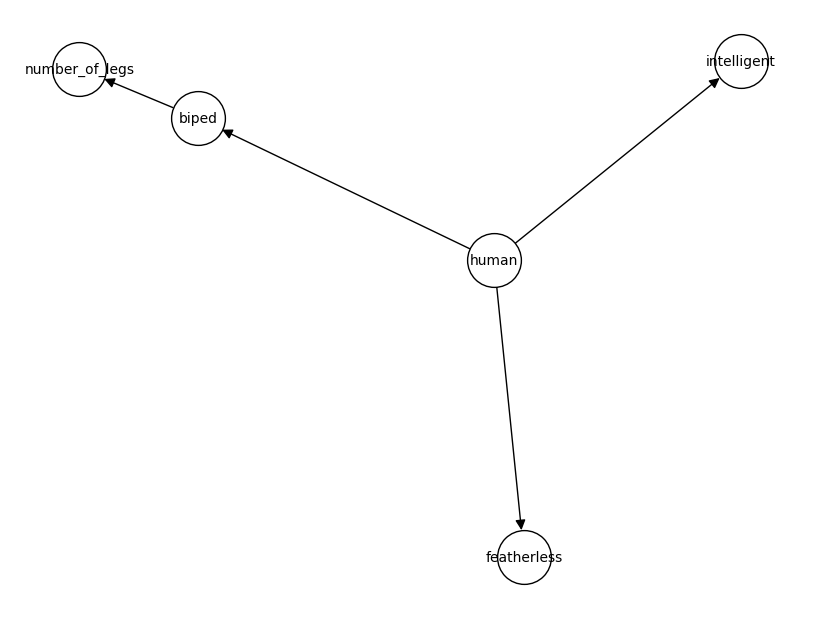

In [47]:
visualize_graph(create_graph(ef.types()["types"], "human"))

We have somewhat successfully create a dependencies graph from a simple eFLINT, though it is not entirely correct due to missing conjunction and disjunction labels, but we can fix that later.

# Generating questionnaire

First, some example from LiveQL DSL.
```
form Box1HouseOwning {
  "Did you sell a house in 2010?"
     hasSoldHouse: bool
  "Did you buy a house in 2010?"
     hasBoughtHouse: bool
  "Did you enter a loan for maintenance?"
     hasMaintLoan: bool

  if (hasSoldHouse) {
    "Private debts for the sold house:"
       privateDebt: int
    "Price the house was sold for:"
       sellingPrice: int
    "Value residue:"
       valueResidue: int (sellingPrice - privateDebt)
  }
}
```

This means that we have to target most relevant leaf nodes in our graph to generate the questionnaire.

In [48]:
human_node = create_graph(ef.types()["types"], "human")
human_node

Node(name='human', dependencies=['biped', 'featherless', 'intelligent'])

In [49]:
def collect_leaf_nodes(node: Node, visited=None) -> set:
    if visited is None:
        visited = set()

    if node.name in visited:
        return set()

    visited.add(node.name)

    if not node.dependencies:
        return {node.name}

    leaves = set()
    for dep in node.dependencies:
        leaves.update(collect_leaf_nodes(dep, visited))
    return leaves


def generate_dsl(root: Node, form_name: str = "GeneratedForm") -> str:
    leaf_nodes = collect_leaf_nodes(root)

    lines = [f"form {form_name} {{"]
    for name in sorted(leaf_nodes):
        question = f'"Do you have {name.replace("_", " ")}?"'
        lines.append(f"  {question}")
        lines.append(f"     {name}: bool")
    lines.append("}")

    return "\n".join(lines)

In [50]:
dsl_output = generate_dsl(human_node, "HumanForm")
print(dsl_output)

form HumanForm {
  "Do you have featherless?"
     featherless: bool
  "Do you have intelligent?"
     intelligent: bool
  "Do you have number of legs?"
     number_of_legs: bool
}


Then we can produce a .ql file then open it in LiveQL editor.

In [51]:
import os


def save_dsl_to_file(root: Node, form_name: str, path: str):
    dsl_content = generate_dsl(root, form_name)

    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "w") as f:
        f.write(dsl_content)

    print(f"DSL saved to {path}")

In [52]:
save_dsl_to_file(human_node, form_name="HumanForm",
                 path="/Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql")

DSL saved to /Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql


Then we can start an editor in LiveQL and open the file.

In [53]:
os.environ['PATH'] = "/opt/homebrew/opt/openjdk@21/bin:" + os.environ['PATH']

In [54]:
# subprocess.run(["sh", "/Users/tiemfah/Projects/LiveQL/run.sh"])

We got the wording totally wrong, the typing is missing and right now it is asking all possible leaf nodes, which is unnecessary. We need to fix that.
![Wrong form wording](img/wrong_form_wording.png)

In [55]:
ef.types()

{'types': {'actor': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyString'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': True, 'invariant': False}, 'kind-type': 'Fact'}},
  'biped': {'closed': True,
   'conditions': [],
   'derivation': [{'derivation-type': 'HoldsWhen',
     'term': {'t': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
            'var': {'domID': 'entity', 'string': ''}},
           'var': {'domID': 'entity', 'string': ''}},
          {'term': {'domID': 'int',
            't': {'int': 2, 'term-type': 'IntLit'},
            'term-type': 'Tag'},
           'var': {'domID': 'int', 'string': ''}}]},
        'domID': 'number_of_legs',
        'term-type': 'App'},
       'term-type': 'Present'},
      'term-type': 'Exists',
      'vars': [{'domID': 'number_of_legs', 'string': ''}]}}],
   'domain': {'domain-type': 'Products',
    'vars': [{'domID': 'entity', 'string': ''}]},
 

# Introducing `AND` and `OR` into the graph
because what we have right now is not sufficient.

In [56]:
from typing import Union

ALL_NODE_TYPES = Union["Node", "OrNode", "AndNode", "EqualsNode", "GreaterNode"]


@dataclass
class Node:
    name: str
    dependencies: List[Node] = None

    def __repr__(self):
        dep_names = [dep.name for dep in self.dependencies]
        return f"{type(self).__name__}(name='{self.name}', dependencies={dep_names})"

    def __post_init__(self):
        if self.dependencies is None:
            self.dependencies = []


@dataclass
class OrNode(Node):
    name: str = "OR"


@dataclass
class AndNode(Node):
    name: str = "AND"


@dataclass
class EqualsNode(Node):
    name: str = "EQUALS"
    left: Node = None
    right: Node = None

    def __repr__(self):
        return f"EqualsNode(left={self.left.name}, right={self.right.name})"


@dataclass
class GreaterNode(Node):
    name: str = "GREATER"
    left: Node = None
    right: Node = None

    def __repr__(self):
        return f"GreaterNode(left={self.left.name}, right={self.right.name})"


@dataclass
class CountNode(Node):
    name: str = "COUNT"

After we have some dataclasses, we can start parsing the json response into graph. then with another function we could visualize only the node that is related to the query.

In [57]:
from typing import Dict


def create_graph(types_res: dict) -> Dict[str, Node]:
    """
    Convert a response types json to a graph that is connected then return the dict of query to root node of that query.
    """
    name_to_node = {}  # Cache for nodes we've already created

    def _extract_dependencies(node_name: str) -> List[ALL_NODE_TYPES]:
        """
        Recursively extract dependencies from the types response.
        """
        # Skip if the node_name doesn't exist in the types dictionary
        if node_name not in types_res["types"]:
            return []

        # Already traverse this before.
        if node_name in name_to_node:
            return [name_to_node[node_name]]  # Return the node, not just its dependencies

        # Else create a new node for this name
        node = Node(name=node_name)
        name_to_node[node_name] = node

        # Extract dependencies from derivations
        dependencies = []
        type_definition = types_res["types"][node_name]

        # Skip if there are no derivations
        if "derivation" not in type_definition or not type_definition["derivation"]:
            return [node]

        for derivation in type_definition["derivation"]:
            if derivation["derivation-type"] == 'HoldsWhen':
                term = derivation["term"]
                parsed_term = _parse_term(term)
                if parsed_term:
                    dependencies.extend(parsed_term)

        node.dependencies = dependencies
        return [node]

    def _parse_term(term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse a term structure and return corresponding nodes"""
        term_type = term.get("term-type")

        if not term_type:
            return []

        if term_type == 'And':
            and_node = AndNode()

            # Handle t1
            t1 = term.get("t1", {})
            t1_deps = _parse_term(t1)
            if t1_deps:
                and_node.dependencies.extend(t1_deps)

            # Handle t2
            t2 = term.get("t2", {})
            t2_deps = _parse_term(t2)
            if t2_deps:
                and_node.dependencies.extend(t2_deps)

            return [and_node] if and_node.dependencies else []

        elif term_type == 'Or':
            or_node = OrNode()

            # Handle t1
            t1 = term.get("t1", {})
            t1_deps = _parse_term(t1)
            if t1_deps:
                or_node.dependencies.extend(t1_deps)

            # Handle t2
            t2 = term.get("t2", {})
            t2_deps = _parse_term(t2)
            if t2_deps:
                or_node.dependencies.extend(t2_deps)

            return [or_node] if or_node.dependencies else []

        elif term_type == 'Present':
            t = term.get("t", {})
            return _parse_term(t)

        elif term_type == 'Exists':
            present_term = term.get("t", {})
            if present_term.get("term-type", "") == 'Present':
                inner_present_term = present_term.get("t", {})
                if inner_present_term.get("term-type", "") == 'App':
                    left_value = inner_present_term.get("domID", '')

                    right_value = None
                    args = inner_present_term.get("args", {}).get('Right', [])
                    for arg in args:
                        term_obj = arg.get('term', {})
                        if term_obj.get('term-type') == 'Tag' and term_obj.get('domID') == 'int':
                            int_lit = term_obj.get('t', {})
                            if int_lit.get('term-type') == 'IntLit':
                                right_value = int_lit.get('int')
                                break
                    if left_value and right_value is not None:
                        # Create nodes for left and right sides
                        left_node = Node(name=left_value)
                        right_node = Node(name=str(right_value))

                        # Create the equality node
                        equals_node = EqualsNode(
                            name=f"{left_value} == {right_value}",
                            dependencies=[left_node, right_node],
                            left=left_node,
                            right=right_node
                        )
                        return [equals_node]

            t = term.get("t", {})
            return _parse_term(t)

        elif term_type == 'App':
            dom_id = term.get("domID")
            if dom_id and dom_id in types_res["types"]:
                return _extract_dependencies(dom_id)

        return []

    # Process all types
    for type_name in types_res["types"]:
        if type_name not in name_to_node:
            _extract_dependencies(type_name)

    return name_to_node


In [58]:
type_graph = create_graph(ef.types())
type_graph

{'actor': Node(name='actor', dependencies=[]),
 'biped': Node(name='biped', dependencies=['number_of_legs == 2']),
 'entity': Node(name='entity', dependencies=[]),
 'featherless': Node(name='featherless', dependencies=[]),
 'human': Node(name='human', dependencies=['OR']),
 'intelligent': Node(name='intelligent', dependencies=[]),
 'int': Node(name='int', dependencies=[]),
 'number_of_legs': Node(name='number_of_legs', dependencies=[]),
 'string': Node(name='string', dependencies=[])}

In [59]:
def visualize_graph(node: ALL_NODE_TYPES, fig_size=(12, 9), title=None):
    """
    Visualize a Node and its dependencies as a network graph using NetworkX and Matplotlib.
    Properly handles AndNode and OrNode types.
    """
    # Create directed graph
    graph = nx.DiGraph()

    # Keep track of visited nodes to avoid cycles
    visited = set()

    root_node = node

    # Add nodes and edges recursively
    def add_nodes_and_edges(n, parent=None):
        if isinstance(n, EqualsNode):
            node_label = "EXISTS"
            node_color = 'lightyellow'
        elif isinstance(n, AndNode):
            node_label = "AND"
            node_color = 'lightgreen'
        elif isinstance(n, OrNode):
            node_label = "OR"
            node_color = 'salmon'
        elif isinstance(n, Node):
            node_label = n.name
            node_color = 'lightblue'
            if id(n) == id(root_node):
                node_color = 'pink'
        else:
            return

        # Add the node with its attributes
        graph.add_node(id(n), label=node_label, color=node_color)

        # Add edge from parent if it exists
        if parent:
            graph.add_edge(parent, id(n))

        # Skip if we've already processed this Node to avoid cycles
        if isinstance(n, Node) and n.name in visited:
            return

        # Mark as visited
        if isinstance(n, Node):
            visited.add(n.name)

        # Process dependencies
        for dep in n.dependencies:
            add_nodes_and_edges(dep, id(n))

        if isinstance(n, EqualsNode):
            add_nodes_and_edges(n.left, id(n))
            add_nodes_and_edges(n.right, id(n))

    # Start with the main node
    add_nodes_and_edges(node)

    # Extract node attributes
    node_colors = [graph.nodes[n].get('color', 'white') for n in graph.nodes()]
    node_labels = {n: graph.nodes[n].get('label', n) for n in graph.nodes()}

    # Create figure
    plt.figure(figsize=fig_size)
    if title:
        plt.title(title)

    # Set node positions
    pos = nx.spring_layout(graph, seed=42, k=0.5)

    # Draw nodes
    nx.draw(graph, pos,
            labels=node_labels,
            node_color=node_colors,
            edgecolors='black',
            node_size=2000,
            font_size=10,
            font_weight='bold',
            width=1.5,
            arrows=True,
            arrowsize=20,
            arrowstyle='-|>',
            connectionstyle='arc3,rad=0.1')

    # Adjust figure margins instead of using tight_layout
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.axis('off')
    return plt

<module 'matplotlib.pyplot' from '/Users/tiemfah/Projects/eFLINTAnswers/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

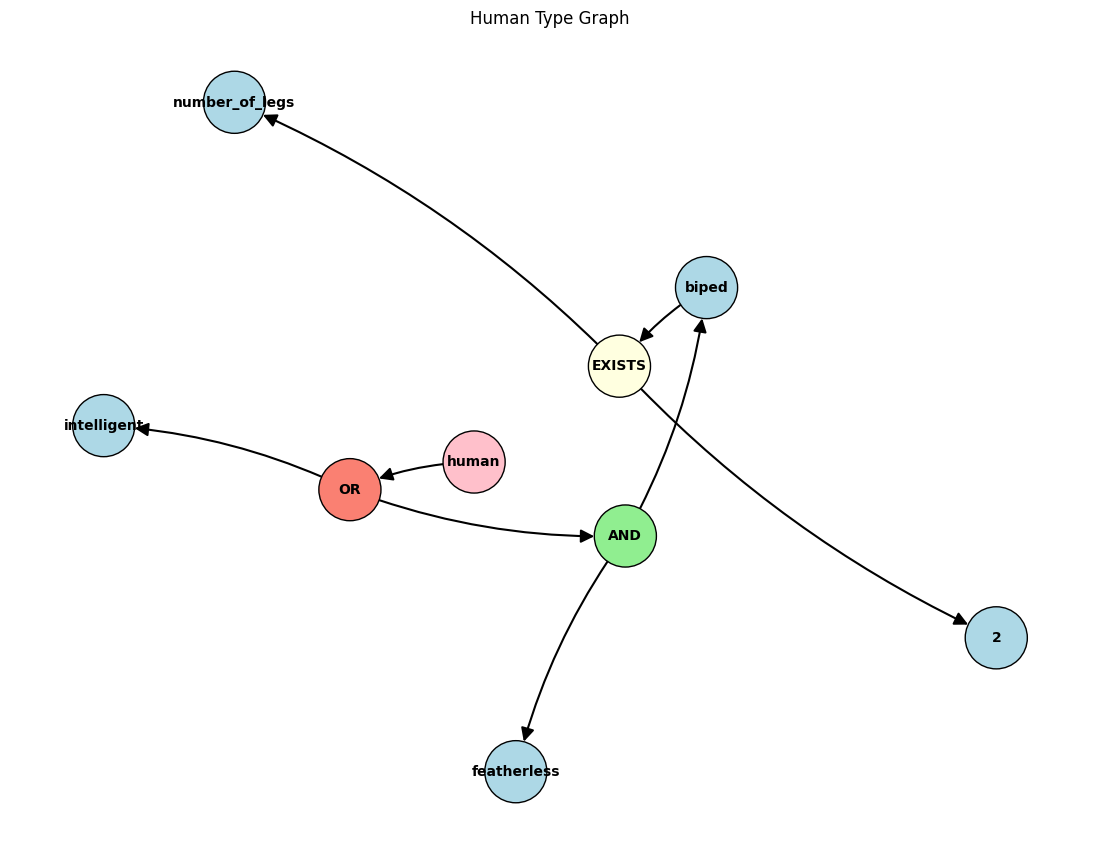

In [60]:
visualize_graph(type_graph["human"], title="Human Type Graph")

# Giving feedback to user

Now to generate the questionnaires that is aware of `AND` and `OR` in the graph, we need to make some kind of response from the form itself. For example, we could use `"Result" test: str("property xxx holds: False")` to send the response back to user. We are expecting to generate something like this from the graph
```
form HumanForm {
  "Do you have featherless?"
     featherless: bool
  "Do you have intelligent?"
     intelligent: bool
  "Do you have number of legs?"
     number_of_legs: bool
}
```

There is a problem with this one, the result is from the form itself. But we should use the reasoning engine from eFLINT server. For instance, the number_of_legs will be much harder in the future once it is fixed. So the solution could be:

1. Modify LiveQL to let python monitor user action in the form and recreate those action in eFLINT server. Like typing `2` into `number_of_legs` will create `number_of_legs(questionnaire, 2)` in eFLINT server. And after every action, we will ask the server if the property is true or false.

2. We skip reasoning engine in eFLINT and do magic to parse the graph into complicated value in LiveQL, for example, we can display the result immediately in the form with the example below.
```
form HumanForm {
    ...
    "Result of human property"
         result: bool(intelligent || (featherless && number_of_legs == 2))
}
```

~~3. We discard LiveQL and build our own form in Python, this will allow us to connect to eFLINT server and ask for the result easily. But we have no idea how much work is needed to build a form in Python.~~

# Add missing typing and Fix the wording
And possibly fix liveQL boolean default value.

We can infer type by looking at `domain` of the type.
```
    'number_of_legs': {
      'domain': {
        'domain-type': 'Products',
        'vars': [
          {
            'domID': 'entity',
            'string': ''
          },
          {
            'domID': 'int',
            'string': ''
          }
        ]
      },
    },
```
and
```
    'intelligent': {
      'domain': {
        'domain-type': 'Products',
        'vars': [
          {
            'domID': 'entity',
            'string': ''
          }
        ]
      },
    },
```
Notice that for intelligent, there isn't extra type because it just means that member of set intelligent are member of entity, this just mean that they are boolean.

In [61]:
def infer_types_from_domains(types_res: dict) -> Dict[str, str]:
    """
    THIS ONE COULD ONLY HANDLE PRODUCTS OF 2 TYPE

    Infers types from domain structures and returns a dictionary mapping node names to types.

    Args:
        types_res: Dictionary containing the 'types' key with node definitions

    Returns:
        Dictionary mapping node names to their inferred types
    """
    type_map = {}
    types_data = types_res.get('types', {})

    for node_name, node_info in types_data.items():
        if 'domain' in node_info:
            domain = node_info['domain']
            domain_type = domain.get('domain-type')

            if domain_type == 'AnyString':
                type_map[node_name] = 'string'
            elif domain_type == 'AnyInt':
                type_map[node_name] = 'int'
            elif domain_type == 'Products':
                vars_list = domain.get('vars', [])
                if len(vars_list) == 1:
                    # Single entity var indicates boolean property
                    type_map[node_name] = 'bool'
                elif len(vars_list) == 2:
                    dom_ids = [var.get('domID') for var in vars_list]
                    if 'entity' in dom_ids and 'int' in dom_ids:
                        # Entity and int vars indicate numeric property
                        type_map[node_name] = 'int'

    return type_map

In [62]:
infer_types_from_domains(ef.types())

{'actor': 'string',
 'biped': 'bool',
 'entity': 'string',
 'featherless': 'bool',
 'human': 'bool',
 'int': 'int',
 'intelligent': 'bool',
 'number_of_legs': 'int',
 'string': 'string'}

In [63]:
def collect_leaf_nodes(node: ALL_NODE_TYPES, visited=None) -> set:
    if visited is None:
        visited = set()

    if node.name in visited:
        return set()

    visited.add(node.name)

    if not node.dependencies:
        return {node.name}

    leaves = set()

    if isinstance(node, EqualsNode):
        return collect_leaf_nodes(node.left, visited)

    for dep in node.dependencies:
        leaves.update(collect_leaf_nodes(dep, visited))
    return leaves

In [64]:
collect_leaf_nodes(type_graph["human"], visited=set())

{'featherless', 'intelligent', 'number_of_legs'}

In [65]:
def node_to_string(root: ALL_NODE_TYPES) -> str:
    """
    Convert a Node graph into a string representation of a logical expression.

    Examples:
    - "bool(intelligent || (featherless && number_of_legs == 2))"

    Args:
        root: The root node of the graph

    Returns:
        A string representation of the logical expression
    """
    # Keep track of visited nodes to avoid cycles
    visited = set()

    def process_node(node):
        # Avoid cycles by tracking visited nodes by their identity
        node_id = id(node)
        if node_id in visited:
            return node.name  # Return just the name to avoid infinite recursion

        visited.add(node_id)

        if isinstance(node, OrNode):
            # Get all dependencies and join them with OR operator
            deps = [process_node(dep) for dep in node.dependencies]
            deps_str = " || ".join(deps)
            return deps_str

        elif isinstance(node, AndNode):
            # Get all dependencies and join them with AND operator
            deps = [process_node(dep) for dep in node.dependencies]
            deps_str = " && ".join(deps)
            return deps_str

        elif isinstance(node, EqualsNode):
            # Process equals operator with left and right sides
            left = process_node(node.left) if node.left else ""
            right = process_node(node.right) if node.right else ""
            return f"{left} == {right}"

        elif isinstance(node, Node):
            # For a regular node:
            # 1. If it has dependencies, process them
            if node.dependencies:
                # This is a node that leads to other nodes in the graph
                # Instead of returning its name, we need to process its dependencies
                # This is likely where the original function went wrong
                if len(node.dependencies) == 1:
                    # If there's only one dependency, just return that result
                    return process_node(node.dependencies[0])
                else:
                    # Multiple dependencies - would need to define how these combine
                    # For now, assuming they combine with AND
                    deps = [process_node(dep) for dep in node.dependencies]
                    return " && ".join(deps)
            else:
                # It's a leaf node, just return its name
                return node.name

        # Handle edge cases
        return ""

    # Start with the root node and wrap in bool()
    result_string = process_node(root)

    # Add parentheses for complex expressions
    if " || " in result_string or " && " in result_string:
        if not (result_string.startswith("(") and result_string.endswith(")")):
            # Add parentheses for proper grouping in complex expressions
            parts = result_string.split(" || ")
            for i, part in enumerate(parts):
                if " && " in part and not (part.startswith("(") and part.endswith(")")):
                    parts[i] = f"({part})"
            result_string = " || ".join(parts)

    return f"({result_string})"

In [66]:
human_node = type_graph["human"]
node_to_string(human_node)

'((number_of_legs == 2 && featherless) || intelligent)'

In [67]:
def generate_dsl(root: Node, node_to_type: Dict[str, str], form_name: str = "GeneratedForm") -> str:
    leaf_nodes = collect_leaf_nodes(root)

    lines = [f"form {form_name} {{"]
    for name in sorted(leaf_nodes):
        node_type = node_to_type.get(name, 'string')  # Default to string if type not found

        # Format name for question by replacing underscores with spaces
        formatted_name = name.replace("_", " ")

        # Customize question based on the type
        if node_type == 'bool':
            question = f'"Is the actor {formatted_name}?"'
        elif node_type == 'int':
            question = f'"How many {formatted_name} does the actor have?"'
        elif node_type == 'string':
            question = f'"What is the actor {formatted_name}?"'
        else:
            # Generic fallback for any other types
            question = f'"Enter your {formatted_name}:"'

        lines.append(f"  {question}")
        lines.append(f"     {name}: {node_type}")

    # Add the logical expression from the root node
    lines.append(f"  if {node_to_string(root)} " + "{")
    lines.append(f"    \"Property {root.name} holds\" result: bool(true)")
    lines.append("  } else {")
    lines.append(f"    \"Property {root.name} does not holds\" result: bool(true)")
    lines.append("  }")
    lines.append("}")

    return "\n".join(lines)

In [68]:
dsl_output = generate_dsl(type_graph["human"], infer_types_from_domains(ef.types()), "HumanForm")
print(dsl_output)

form HumanForm {
  "Is the actor featherless?"
     featherless: bool
  "Is the actor intelligent?"
     intelligent: bool
  "How many number of legs does the actor have?"
     number_of_legs: int
  if ((number_of_legs == 2 && featherless) || intelligent) {
    "Property human holds" result: bool(true)
  } else {
    "Property human does not holds" result: bool(true)
  }
}


# Giving feedback to user # Solution 1: embedded reasoning within LiveQL

To be able to give responses or show further form in case that more information is needed, the LiveQL must have some kind of reasoning logic within the DSL. And we can achieve that with logic operator. For example, the graph that we parsed from `types response` should be transformed into
```bool(intelligent || (featherless && number_of_legs == 2))```
 for LiveQL to be aware of the reasoning engine.

```
  if ((number_of_legs == 2 && featherless) || intelligent) {
    "Property human holds" result: bool(true)
  } else {
    "Property human does not holds" result: bool(true)
  }
```

In [69]:
def generate_dsl(root: Node, node_to_type: Dict[str, str], form_name: str = "GeneratedForm") -> str:
    leaf_nodes = collect_leaf_nodes(root)

    lines = [f"form {form_name} {{"]
    for name in sorted(leaf_nodes):
        node_type = node_to_type.get(name, 'string')  # Default to string if type not found

        # Format name for question by replacing underscores with spaces
        formatted_name = name.replace("_", " ")

        # Customize question based on the type
        if node_type == 'bool':
            question = f'"Is the actor {formatted_name}?"'
        elif node_type == 'int':
            question = f'"How many {formatted_name} does the actor have?"'
        elif node_type == 'string':
            question = f'"What is the actor {formatted_name}?"'
        else:
            # Generic fallback for any other types
            question = f'"Enter your {formatted_name}:"'

        lines.append(f"  {question}")
        lines.append(f"     {name}: {node_type}")

    # Add the logical expression from the root node
    lines.append(f"  if {node_to_string(root)} " + "{")
    lines.append(f"    \"Property {root.name} holds\" result: bool(true)")
    lines.append("  } else {")
    lines.append(f"    \"Property {root.name} does not holds\" result: bool(true)")
    lines.append("  }")
    lines.append("}")

    return "\n".join(lines)

In [70]:
def save_dsl_to_file(root: Node, form_types: Dict[str, str], form_name: str, path: str):
    dsl_content = generate_dsl(root, form_types, form_name)

    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "w") as f:
        f.write(dsl_content)

    print(f"DSL saved to {path}")

In [71]:
save_dsl_to_file(root=type_graph["human"], form_types=infer_types_from_domains(ef.types()), form_name="HumanForm",
                 path="/Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql")

DSL saved to /Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql


In [72]:
# subprocess.run(["sh", "/Users/tiemfah/Projects/LiveQL/run.sh"])

Property checking statement will only refresh after it loses window focus for `int` field.

![Giving feedback to user](img/giving_feedback.png)

# More advance concept in eFLINT: 2 of the same type

In [88]:
ef.revert(1)
ef.phrase("Fact actor Identified by String")
ef.phrase("Fact stick Identified by String")
ef.phrase("Fact own_a_stick Identified by actor * stick")
ef.phrase("Fact own_chopsticks Identified by actor Holds when Count(Foreach own_a_stick: own_a_stick When own_a_stick.actor == actor) <= 2")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 377,
 'old-state': 376,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

But we don't support `>` relation yet, and the graph will not work properly. And also take the chance to refactor `create_graph` function.

In [74]:
from typing import Optional


class TermParser:
    """Handles parsing of term structures into nodes"""

    def __init__(self, types_response: dict, node_cache: Dict[str, Node]):
        self.types_response = types_response
        self.node_cache = node_cache

    def parse_term(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse a term structure and return corresponding nodes"""
        term_type = term.get("term-type")
        if not term_type:
            return []

        parser_method = getattr(self, f'_parse_{term_type.lower()}', None)
        if parser_method:
            return parser_method(term)

        return []

    def _parse_and(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse AND term"""
        and_node = AndNode()

        for sub_term_key in ["t1", "t2"]:
            sub_term = term.get(sub_term_key, {})
            sub_dependencies = self.parse_term(sub_term)
            and_node.dependencies.extend(sub_dependencies)

        return [and_node] if and_node.dependencies else []

    def _parse_or(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse OR term"""
        or_node = OrNode()

        for sub_term_key in ["t1", "t2"]:
            sub_term = term.get(sub_term_key, {})
            sub_dependencies = self.parse_term(sub_term)
            or_node.dependencies.extend(sub_dependencies)

        return [or_node] if or_node.dependencies else []

    def _parse_present(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse Present term"""
        sub_term = term.get("t", {})
        return self.parse_term(sub_term)

    def _parse_exists(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse Exists term"""
        equals_node = self._try_parse_equality(term)
        if equals_node:
            return [equals_node]

        # Fallback to parsing the nested term
        sub_term = term.get("t", {})
        return self.parse_term(sub_term)

    def _parse_intlit(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse Intlit term"""
        return [Node(term["int"])]

    def _parse_count(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse Count term"""
        count_node = CountNode()

        count_vars = term.get("vars", [])
        for var in count_vars:
            count_node.dependencies.append(Node(var["domID"]))

        return [count_node]

    def _parse_ge(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse GE term"""
        greater_than_node = GreaterNode()

        for sub_term_key in ["t1", "t2"]:
            sub_term = term.get(sub_term_key, {})
            sub_dependencies = self.parse_term(sub_term)
            greater_than_node.dependencies.extend(sub_dependencies)

        if len(greater_than_node.dependencies) == 2:
            greater_than_node.left = greater_than_node.dependencies[0]
            greater_than_node.right = greater_than_node.dependencies[1]

        return [greater_than_node] if greater_than_node.dependencies else []

    def _parse_app(self, term: Dict) -> List[ALL_NODE_TYPES]:
        """Parse App term"""
        dom_id = term.get("domID")
        if dom_id and dom_id in self.types_response["types"]:
            return self._extract_dependencies(dom_id)
        return []

    def _try_parse_equality(self, term: Dict) -> Optional[EqualsNode]:
        """Try to parse an equality expression from an Exists term"""
        present_term = term.get("t", {})

        if not self._is_present_term(present_term):
            return None

        inner_term = present_term.get("t", {})
        if not self._is_app_term(inner_term):
            return None

        left_value = inner_term.get("domID", '')
        right_value = self._extract_int_value(inner_term)

        if left_value and right_value is not None:
            return self._create_equality_node(left_value, right_value)

        return None

    def _is_present_term(self, term: Dict) -> bool:
        """Check if term is a Present term"""
        return term.get("term-type") == 'Present'

    def _is_app_term(self, term: Dict) -> bool:
        """Check if term is an App term"""
        return term.get("term-type") == 'App'

    def _extract_int_value(self, app_term: Dict) -> Optional[int]:
        """Extract integer value from App term arguments"""
        args = app_term.get("args", {}).get('Right', [])

        for arg in args:
            term_obj = arg.get('term', {})
            if self._is_int_tag(term_obj):
                int_lit = term_obj.get('t', {})
                if int_lit.get('term-type') == 'IntLit':
                    return int_lit.get('int')

        return None

    def _is_int_tag(self, term_obj: Dict) -> bool:
        """Check if term object is an int tag"""
        return (term_obj.get('term-type') == 'Tag' and
                term_obj.get('domID') == 'int')

    def _create_equality_node(self, left_value: str, right_value: int) -> EqualsNode:
        """Create an equality node with left and right operands"""
        left_node = Node(name=left_value)
        right_node = Node(name=str(right_value))

        return EqualsNode(
            name=f"{left_value} == {right_value}",
            dependencies=[left_node, right_node],
            left=left_node,
            right=right_node
        )

    def _extract_dependencies(self, node_name: str) -> List[ALL_NODE_TYPES]:
        """Extract dependencies for a given node name"""
        if node_name not in self.types_response["types"]:
            return []

        if node_name in self.node_cache:
            return [self.node_cache[node_name]]

        node = Node(name=node_name)
        self.node_cache[node_name] = node

        dependencies = self._get_node_dependencies(node_name)
        node.dependencies = dependencies

        return [node]

    def _get_node_dependencies(self, node_name: str) -> List[ALL_NODE_TYPES]:
        """Get dependencies for a specific node"""
        type_definition = self.types_response["types"][node_name]

        if not self._has_derivations(type_definition):
            return []

        dependencies = []
        for derivation in type_definition["derivation"]:
            if derivation.get("derivation-type") == 'HoldsWhen':
                term = derivation.get("term")
                if term:
                    dependencies.extend(self.parse_term(term))

        return dependencies

    def _has_derivations(self, type_definition: Dict) -> bool:
        """Check if type definition has derivations"""
        return ("derivation" in type_definition and
                type_definition["derivation"])


class GraphCreator:
    """Main class for creating graphs from types response"""

    def __init__(self, types_response: dict):
        self.types_response = types_response
        self.node_cache: Dict[str, Node] = {}
        self.term_parser = TermParser(types_response, self.node_cache)

    def create_graph(self) -> Dict[str, Node]:
        """
        Convert a response types json to a graph that is connected then return
        the dict of query to root node of that query.
        """
        self._process_all_types()
        return self.node_cache.copy()

    def _process_all_types(self) -> None:
        """Process all types in the response"""
        for type_name in self.types_response["types"]:
            if type_name not in self.node_cache:
                self.term_parser._extract_dependencies(type_name)


def create_graph(types_res: dict) -> Dict[str, Node]:
    """
    Convert a response types json to a graph that is connected then return
    the dict of query to root node of that query.

    Args:
        types_res: Dictionary containing types response data

    Returns:
        Dictionary mapping type names to their corresponding root nodes
    """
    creator = GraphCreator(types_res)
    return creator.create_graph()

In [80]:
ef.types()

{'types': {'actor': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyString'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  'int': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyInt'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  'own_a_stick': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'Products',
    'vars': [{'domID': 'actor', 'string': ''},
     {'domID': 'stick', 'string': ''}]},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  'own_chopsticks': {'closed': True,
   'conditions': [],
   'derivation': [{'derivation-type': 'HoldsWhen',
     'term': {'t1'

In [75]:
create_graph(ef.types())["own_chopsticks"]

Node(name='own_chopsticks', dependencies=[])

<module 'matplotlib.pyplot' from '/Users/tiemfah/Projects/eFLINTAnswers/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

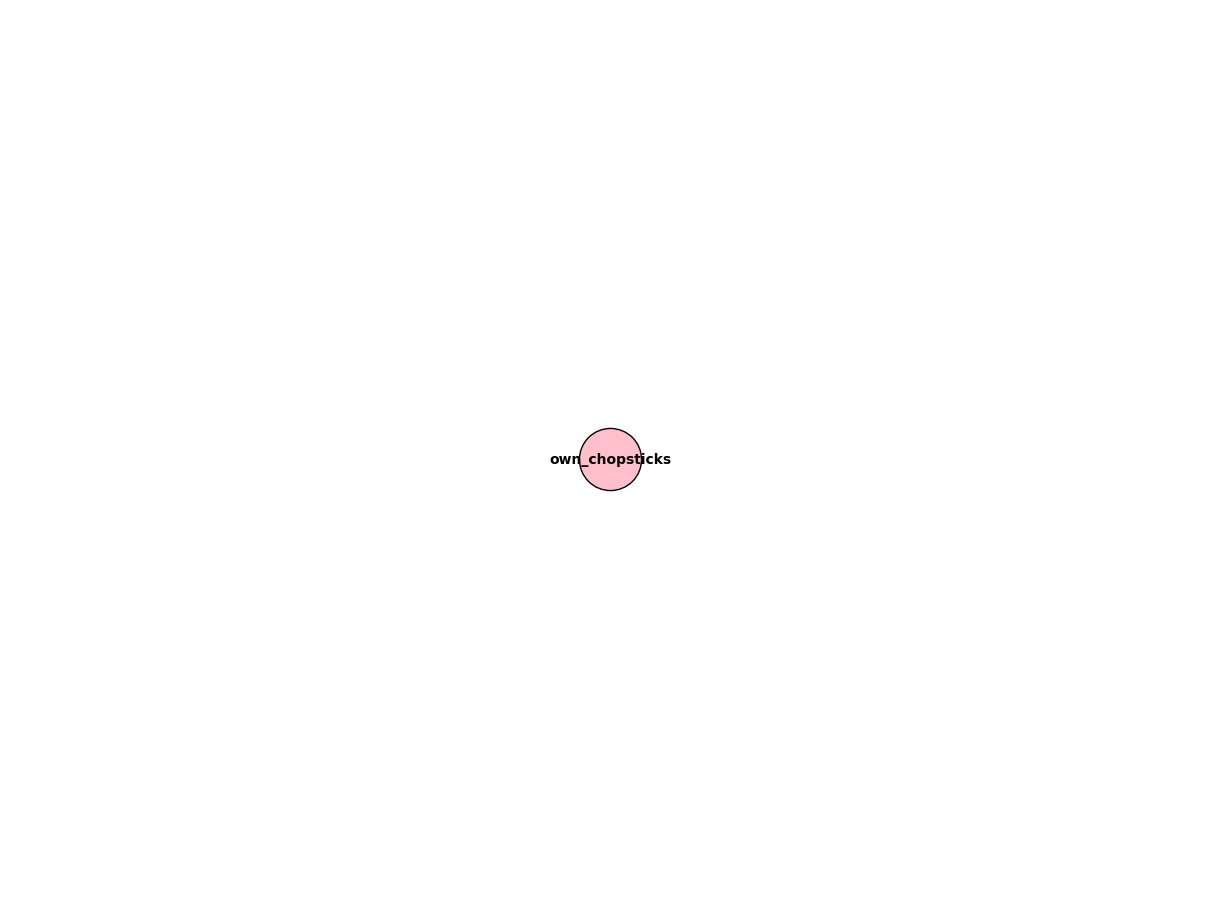

In [76]:
visualize_graph(create_graph(ef.types())["own_chopsticks"])

# Moving everything into a file
Because this notebook is getting too long.

In [91]:
import model
import graph_visualizer
import importlib

importlib.reload(model)
importlib.reload(eflint_parser)
importlib.reload(graph_visualizer)

from model import *
from eflint.eflint_parser import create_graph
from graph_visualizer import visualize_graph

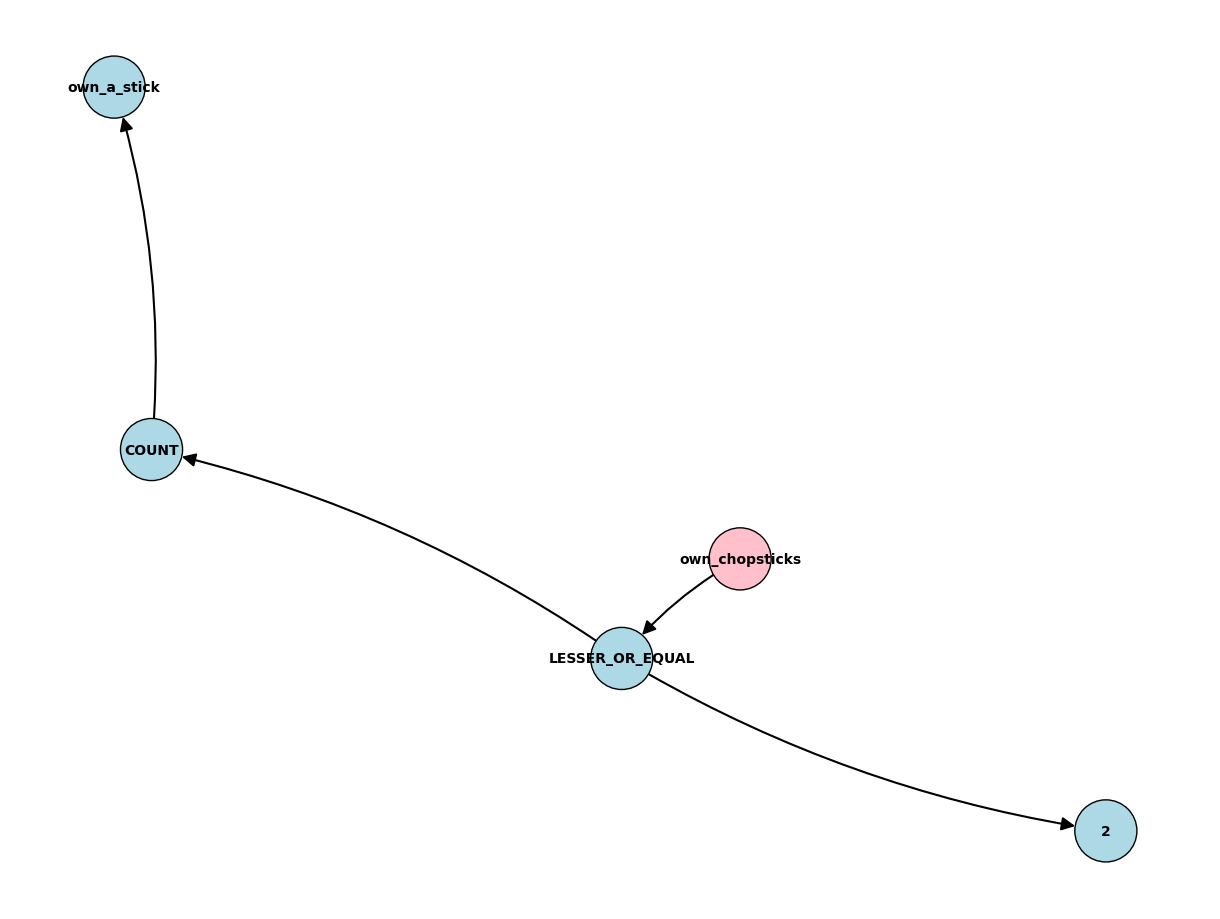

<module 'matplotlib.pyplot' from '/Users/tiemfah/Projects/eFLINTAnswers/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [92]:
graph = create_graph(ef.types())
own_chopsticks_node = graph["own_chopsticks"]
visualize_graph(own_chopsticks_node)

# Ask fewer questions
If an entity is intelligent, it is automatically considered human. To minimize the number of questions, the form should first ask "Is it intelligent?". If the answer is yes, no further questions are needed and the result can be shown immediately. If not, the next question should be either "Is it featherless?" or "How many legs does it have?".

In [3]:
from eflint.eflint_lib import EF
ef = EF()
ef.revert(1)
ef.phrase("Fact entity Identified by String")
ef.phrase("Fact number_of_legs Identified by entity * int")
ef.phrase("Fact featherless Identified by entity")
ef.phrase("Fact biped Identified by entity Holds when (Exists number_of_legs : number_of_legs(entity, 2))")
ef.phrase("Fact intelligent Identified by entity")
ef.phrase("Fact human Identified by entity Holds when (biped(entity) && featherless(entity)) || intelligent(entity)")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 7,
 'old-state': 6,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}

To achieve that, we need to split it into set of questions first. From this example there would be two set of questions.
1. {"intelligent"}
2. {"featherless", "number_of_legs"}
And the set divider would be the `OR` node.

In [9]:
ef.types()

{'types': {'actor': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'AnyString'},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': True, 'invariant': False}, 'kind-type': 'Fact'}},
  'biped': {'closed': True,
   'conditions': [],
   'derivation': [{'derivation-type': 'HoldsWhen',
     'term': {'t': {'t': {'args': {'Right': [{'term': {'term-type': 'Ref',
            'var': {'domID': 'entity', 'string': ''}},
           'var': {'domID': 'entity', 'string': ''}},
          {'term': {'domID': 'int',
            't': {'int': 2, 'term-type': 'IntLit'},
            'term-type': 'Tag'},
           'var': {'domID': 'int', 'string': ''}}]},
        'domID': 'number_of_legs',
        'term-type': 'App'},
       'term-type': 'Present'},
      'term-type': 'Exists',
      'vars': [{'domID': 'number_of_legs', 'string': ''}]}}],
   'domain': {'domain-type': 'Products',
    'vars': [{'domID': 'entity', 'string': ''}]},
 

In [8]:
ef.phrase("Fact earth_alien Derived from entity")

{'all-disabled-transitions': [],
 'all-duties': [],
 'all-enabled-transitions': [],
 'created_facts': [],
 'errors': [],
 'inst-query-results': [],
 'new-disabled-transitions': [],
 'new-duties': [],
 'new-enabled-transitions': [],
 'new-state': 8,
 'old-state': 7,
 'output-events': [],
 'query-results': [],
 'response': 'success',
 'source_contents': [],
 'target_contents': [],
 'terminated-duties': [],
 'terminated_facts': [],
 'violations': []}